In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time
import random
import multiprocessing

## 1. 补充全连通图扩散

In [2]:
def diffuse(p, q, m, num_runs=24):  # 全联通扩散模拟
    num_of_adopt = []
    for j in xrange(num_runs):
        dose = sum(num_of_adopt)  # 邻居数量
        prob = p + q * dose
        x = sum([ 1 for i in xrange(m - sum(num_of_adopt)) if random.random() <= prob ])
        num_of_adopt.append(x)
        
    return num_of_adopt

In [21]:
pq_range = [(i, j) for i in np.linspace(0.001, 0.021, num=5) for j in np.linspace(0.2, 0.6, num=20)]
result = []
for p, q in pq_range:
    t1 = time.clock()
    diff_cont = []
    for i in range(20):
        diff = diffuse(p, q / 9999, 10000, num_runs=30)
        diff_cont.append(diff)
    
    mean_diff = np.mean(diff_cont, axis=0)
    result.append(np.concatenate(([p, q], mean_diff)))
    print p, q

np.save('complete_graph(10000)', result)

0.001 0.2
0.001 0.221052631579
0.001 0.242105263158
0.001 0.263157894737
0.001 0.284210526316
0.001 0.305263157895
0.001 0.326315789474
0.001 0.347368421053
0.001 0.368421052632
0.001 0.389473684211
0.001 0.410526315789
0.001 0.431578947368
0.001 0.452631578947
0.001 0.473684210526
0.001 0.494736842105
0.001 0.515789473684
0.001 0.536842105263
0.001 0.557894736842
0.001 0.578947368421
0.001 0.6
0.006 0.2
0.006 0.221052631579
0.006 0.242105263158
0.006 0.263157894737
0.006 0.284210526316
0.006 0.305263157895
0.006 0.326315789474
0.006 0.347368421053
0.006 0.368421052632
0.006 0.389473684211
0.006 0.410526315789
0.006 0.431578947368
0.006 0.452631578947
0.006 0.473684210526
0.006 0.494736842105
0.006 0.515789473684
0.006 0.536842105263
0.006 0.557894736842
0.006 0.578947368421
0.006 0.6
0.011 0.2
0.011 0.221052631579
0.011 0.242105263158
0.011 0.263157894737
0.011 0.284210526316
0.011 0.305263157895
0.011 0.326315789474
0.011 0.347368421053
0.011 0.368421052632
0.011 0.389473684211
0.011

In [22]:
data = np.load('complete_graph(10000).npy')

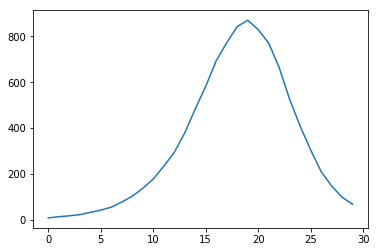

In [29]:
plt.plot(data[7][2:])

### 数据分析

In [15]:
import statsmodels.formula.api as smf
import pandas as pd

In [16]:
est_data = np.load('estimate complete_graph(10000).npy')

In [17]:
zip(np.mean(est_data[:, [4, 5]], axis=0),  np.std(est_data[:, [4, 5]], axis=0))

[(11297.401968845517, 526.60286347816327),
 (0.99847787175320912, 0.0083688201857886734)]

In [18]:
pd_est = pd.DataFrame(est_data, columns=['p', 'q', 'P', 'Q', 'M', 'R2'])

In [19]:
pd_est.head()

,p,q,P,Q,M,R2
0,0.001,0.200000,0.000831,0.184601,10848.972118,0.999745
1,0.001,0.221053,0.000785,0.203549,10751.598948,0.999845
2,0.001,0.242105,0.002732,0.144751,14206.047726,0.915970
3,0.001,0.263158,0.000812,0.233524,11323.387525,0.999775
4,0.001,0.284211,0.000837,0.241817,11787.853658,0.999265


In [20]:
results1 = smf.ols('p ~ P-1', data=pd_est).fit()
a = results1.params['P']
r2 = results1.rsquared
print a, r2

1.37301419043 0.988544612042


In [21]:
results2 = smf.ols('q ~ Q - 1', data=pd_est).fit()
a = results2.params['Q']
r2 = results2.rsquared
print a, r2

1.13565068163 0.997900264734


## 2. 补充预测

### 2.1 度分布异质性

In [39]:
u = "C:\\Users\\XIAOYU\\Desktop\\data\\"
coeff_cont_gnm = np.load(u + "2 degree heterogenous\\estimate gnm_random_graph(10000,30000).npy")
coeff_cont_ba =  np.load(u + "2 degree heterogenous\\estimate barabasi_albert_graph(10000,3).npy")
coeff_cont_exp = np.load(u + "2 degree heterogenous\\estimate exponential_graph(10000,3).npy")
coeff_cont_gua = np.load(u + "2 degree heterogenous\\estimate gaussian_graph(10000,3).npy")
coeff_cont_log = np.load(u + "2 degree heterogenous\\estimate lognormal_graph(10000,3).npy")
coeff_cont_ws0 =  np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0).npy")
coeff_cont_ws01 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.1).npy")
coeff_cont_ws03 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.3).npy")
coeff_cont_ws05 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.5).npy")
coeff_cont_ws07 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.7).npy")
coeff_cont_ws09 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.9).npy")
coeff_cont_ws10 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,1).npy")

In [60]:
d_cont = [coeff_cont_gnm, coeff_cont_ba, coeff_cont_exp, coeff_cont_gua,
                   coeff_cont_log, coeff_cont_ws0, coeff_cont_ws01, coeff_cont_ws03,
                   coeff_cont_ws05, coeff_cont_ws07, coeff_cont_ws09, coeff_cont_ws10]

In [61]:
for i, dataset in enumerate(d_cont):
    d_cont[i] = np.array([np.concatenate((x[0], x[1], x[2:])) for x in dataset], dtype=np.float)

In [62]:
d_cont[0][0]

array([  1.00000000e-03,   5.00000000e-02,   1.37543173e-03,
         2.52742348e-01,   8.91400000e+03,   9.99713576e-01,
         1.24048175e+01])

In [ ]:
def 

## 3. 为什么使用10次重复

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import networkx as nx
import time
import random


class Diffuse:  # 默认网络结构为节点数量为10000，边为30000的随机网络
    def __init__(self, p, q, g=nx.gnm_random_graph(10000, 30000), num_runs=30):
        if not nx.is_directed(g):
            self.g = g.to_directed()
        self.p, self.q = p, q
        self.num_runs = num_runs

    def decision(self, i):  # 线性决策规则
        dose = sum([self.g.node[k]['state'] for k in self.g.predecessors(i)])
        prob = self.p + self.q * dose
        return True if random.random() <= prob else False

    def single_diffuse(self):  # 单次扩散
        for i in self.g:
            self.g.node[i]['state'] = False

        non_adopt_set = [i for i in self.g if not self.g.node[i]['state']]
        num_of_adopt = []
        for j in range(self.num_runs):
            x = 0
            random.shuffle(non_adopt_set)
            for i in non_adopt_set:
                if self.decision(i):
                    self.g.node[i]['state'] = True
                    non_adopt_set.remove(i)
                    x += 1
            num_of_adopt.append(x)
        return num_of_adopt

    def repete_diffuse(self, repetes=10):  # 多次扩散
        return [self.single_diffuse() for i in range(repetes)]

In [3]:
diffuse = Diffuse(p=0.001, q=0.08, num_runs=40)

In [4]:
t1 = time.clock()
diff_cont = diffuse.repete_diffuse(repetes=40)
print('Time: %.2f s' % (time.clock() - t1))

Time: 110.78 s


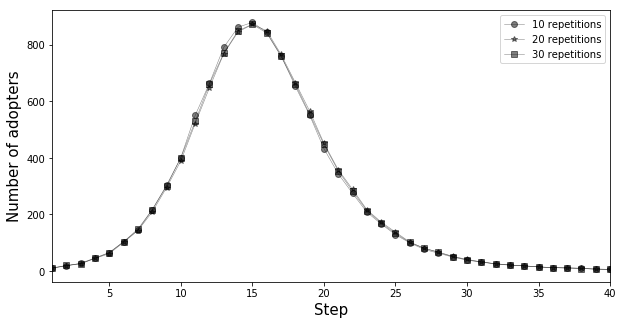

In [24]:
import matplotlib.pyplot as pl

fig = pl.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Step', fontsize=15)
ax.set_ylabel('Number of adopters', fontsize=15)
ax.set_xlim([1, 40])
ax.plot(np.arange(1, 41), np.mean(diff_cont[:10], axis=0),'ko-', lw=0.5, alpha=0.5, label='10 repetitions')
ax.plot(np.arange(1, 41), np.mean(diff_cont[:20], axis=0),'k*-', lw=0.5, alpha=0.5, label='20 repetitions')
ax.plot(np.arange(1, 41), np.mean(diff_cont[:30], axis=0),'ks-', lw=0.5, alpha=0.5, label='30 repetitions')
ax.legend(loc=1)